This notebook walks through a complete machine learning pipeline using the House Price dataset.

## Importing all the **Necessary libraries** 
# **pandas:**
For loading, exploring, and manipulating structured data (like .csv files).
Used for .read_csv(), .head(), .describe(), etc.
# **numpy:**
Provides numerical computing support, especially for arrays and math functions.
Often used under the hood by other libraries
# **seaborn:**
Built on matplotlib; simplifies beautiful statistical plots (histograms, boxplots, heatmaps).
Useful for Univariate/Bivariate Analysis
# **matplotlib:**
A plotting library for basic charts (line, bar, scatter).
Used for understanding distributions and trends.
# **sklearn.model_selection:**
Splits the dataset into training and testing sets.
# **sklearn.svm:**
Machine learning model used to predict house prices.
# **sklearn.metrics**
Evaluate the performance of the regression model.

In [23]:
import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical operations
import seaborn as sns         # Data visualization (statistical plots)
import matplotlib.pyplot as plt  # General plotting
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.svm import SVR   # Support Vector Regression for price prediction
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import StandardScaler
import pickle                 # Saving and loading models

## 📥 Step 1: Data Collection & 🔍 Data Understanding

In this step, we load the dataset and perform basic exploratory analysis to understand the data structure and types.

In [24]:
class DataCollector:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"Data loaded successfully from {self.file_path}")
        return self.data
    
    def describe_the_data(self):
        print(self.data.describe(include='all'))        

    def show_summary(self):
        print("\nData Information:")
        print(self.data.info())
        
    def show_Head_and_Tail(self):
        print("\nHead:")
        print(self.data.head())
        print("\nTail:")
        print(self.data.tail())

## Execution

In [25]:
collector = DataCollector("House Price Prediction Dataset.csv")
data = collector.load_data()
collector.describe_the_data()
collector.show_summary()
collector.show_Head_and_Tail()

Data loaded successfully from House Price Prediction Dataset.csv
                 Id         Area     Bedrooms   Bathrooms       Floors  \
count   2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
unique          NaN          NaN          NaN         NaN          NaN   
top             NaN          NaN          NaN         NaN          NaN   
freq            NaN          NaN          NaN         NaN          NaN   
mean    1000.500000  2786.209500     3.003500     2.55250     1.993500   
std      577.494589  1295.146799     1.424606     1.10899     0.809188   
min        1.000000   501.000000     1.000000     1.00000     1.000000   
25%      500.750000  1653.000000     2.000000     2.00000     1.000000   
50%     1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%     1500.250000  3887.500000     4.000000     4.00000     3.000000   
max     2000.000000  4999.000000     5.000000     4.00000     3.000000   

          YearBuilt  Location Condition Garage

## Step 2: Data Understanding & Preprocessing
1.Changing the data from **Categorical Datatype** to **Numerical Datatype**.    
2.Changing the name of some columns.    
3.Droping the rows with missing columns.    

In [26]:
class DataPreprocessor:
    def __init__(self, data):
        self.data = data.copy()

    def convert_categorical_to_numeric(self):
        '''As some columns have object data type, But i hve to work on only numerical data.    
        Firstly changing the column (Condition) {Poor,Fair,Good,Excellent} into rating {1,2,3,4}'''
        for i in range(2000):
            if data['Condition'][i] == 'Poor':
                data["Condition"][i] = 1
            elif data['Condition'][i] == 'Fair':
                data['Condition'][i] = 2
            elif data['Condition'][i] == 'Good':
                data['Condition'][i] = 3
            elif data['Condition'][i] == 'Excellent':
                data['Condition'][i] = 4
        '''Now changing the Garage column from **Yes** to **1** and **No** to **0**.'''
        for j in range(2000):
            if data["Garage"][j] == "Yes":
                data["Garage"][j] = 1
            elif data["Garage"][j] == "No":
                data["Garage"][j] = 0
        '''Same as above changing the Location column to rating **{"Rular" = 1, "Suburban" = 2, "Urban" = 3, "Downtown" = 4}**.'''"House Price Prediction Dataset.csv"
        for k in range(2000):
            if data['Location'][k] == "Rural":
                data['Location'][k] = 1
            elif data['Location'][k] == "Suburban":
                data['Location'][k] = 2
            elif data['Location'][k] == "Urban":
                data['Location'][k] = 3
            elif data['Location'][k] == "Downtown":
                data['Location'][k] = 4
        return self.data
    def drop_ID_column(self):
        '''Dropping the ID column as it is not useful for prediction.'''
        if 'Id' in self.data.columns:
            self.data.drop(columns=['Id'], inplace=True)
            print("ID column dropped.")
        else:
            print("ID column not found.")
    def scale_features(self):
            scaler = StandardScaler()
            numeric_cols = self.data.select_dtypes(include='number').columns
            self.data[numeric_cols] = scaler.fit_transform(self.data[numeric_cols])
    def get_data(self):
        return self.data

## Initialize and Run Preprocessing

In [37]:
preprocessor = DataPreprocessor(data)
preprocessor.drop_ID_column()
processed_data = preprocessor.convert_categorical_to_numeric()
print(processed_data)

ID column dropped.
      Area  Bedrooms  Bathrooms  Floors  YearBuilt Location Condition Garage  \
0     1360         5          4       3       1970        4         4      0   
1     4272         5          4       3       1958        4         4      0   
2     3592         2          2       3       1938        4         3      0   
3      966         4          2       2       1902        2         2      1   
4     4926         1          4       2       1975        4         2      1   
...    ...       ...        ...     ...        ...      ...       ...    ...   
1995  4994         5          4       3       1923        2         1      0   
1996  3046         5          2       1       2019        2         1      1   
1997  1062         5          1       2       1903        1         1      0   
1998  4062         3          1       2       1936        3         4      1   
1999  2989         5          1       3       1903        2         2      0   

       Price  
0    

In [38]:
print(processed_data.head())

   Area  Bedrooms  Bathrooms  Floors  YearBuilt Location Condition Garage  \
0  1360         5          4       3       1970        4         4      0   
1  4272         5          4       3       1958        4         4      0   
2  3592         2          2       3       1938        4         3      0   
3   966         4          2       2       1902        2         2      1   
4  4926         1          4       2       1975        4         2      1   

    Price  
0  149919  
1  424998  
2  266746  
3  244020  
4  636056  


## Univariate Analysis with visualization

In [39]:
class UnivariateAnalyzer:
    def __init__(self, df):
        self.df = df

    def plot_distributions(self):
        import matplotlib.pyplot as plt
        import seaborn as sns

        sns.set(style="whitegrid")
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Univariate Analysis of Key Features', fontsize=16)

        # Price distribution with pastel color
        sns.histplot(self.df['Price'], kde=True, ax=axes[0, 0], color='skyblue')
        axes[0, 0].set_title('Price Distribution')

        # Area distribution with a different color
        sns.histplot(self.df['Area'], kde=True, ax=axes[0, 1], color='orchid')
        axes[0, 1].set_title('Area Distribution')

        # Bedrooms count plot
        sns.countplot(x='Bedrooms', data=self.df, ax=axes[0, 2], palette='Set2')
        axes[0, 2].set_title('Number of Bedrooms')

        # Bathrooms count plot
        sns.countplot(x='Bathrooms', data=self.df, ax=axes[1, 0], palette='husl')
        axes[1, 0].set_title('Number of Bathrooms')

        # Condition count plot
        sns.countplot(x='Condition', data=self.df, ax=axes[1, 1], palette='coolwarm')
        axes[1, 1].set_title('House Condition Ratings')

        # Garage count plot
        sns.countplot(x='Garage', data=self.df, ax=axes[1, 2], palette='pastel')
        axes[1, 2].set_title('Garage Availability (0 = No, 1 = Yes)')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()





C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2171478891.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bedrooms', data=self.df, ax=axes[0, 2], palette='Set2')
C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2171478891.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bathrooms', data=self.df, ax=axes[1, 0], palette='husl')
C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2171478891.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Condition', data=self.df, ax=axes[1, 1], palette='coo

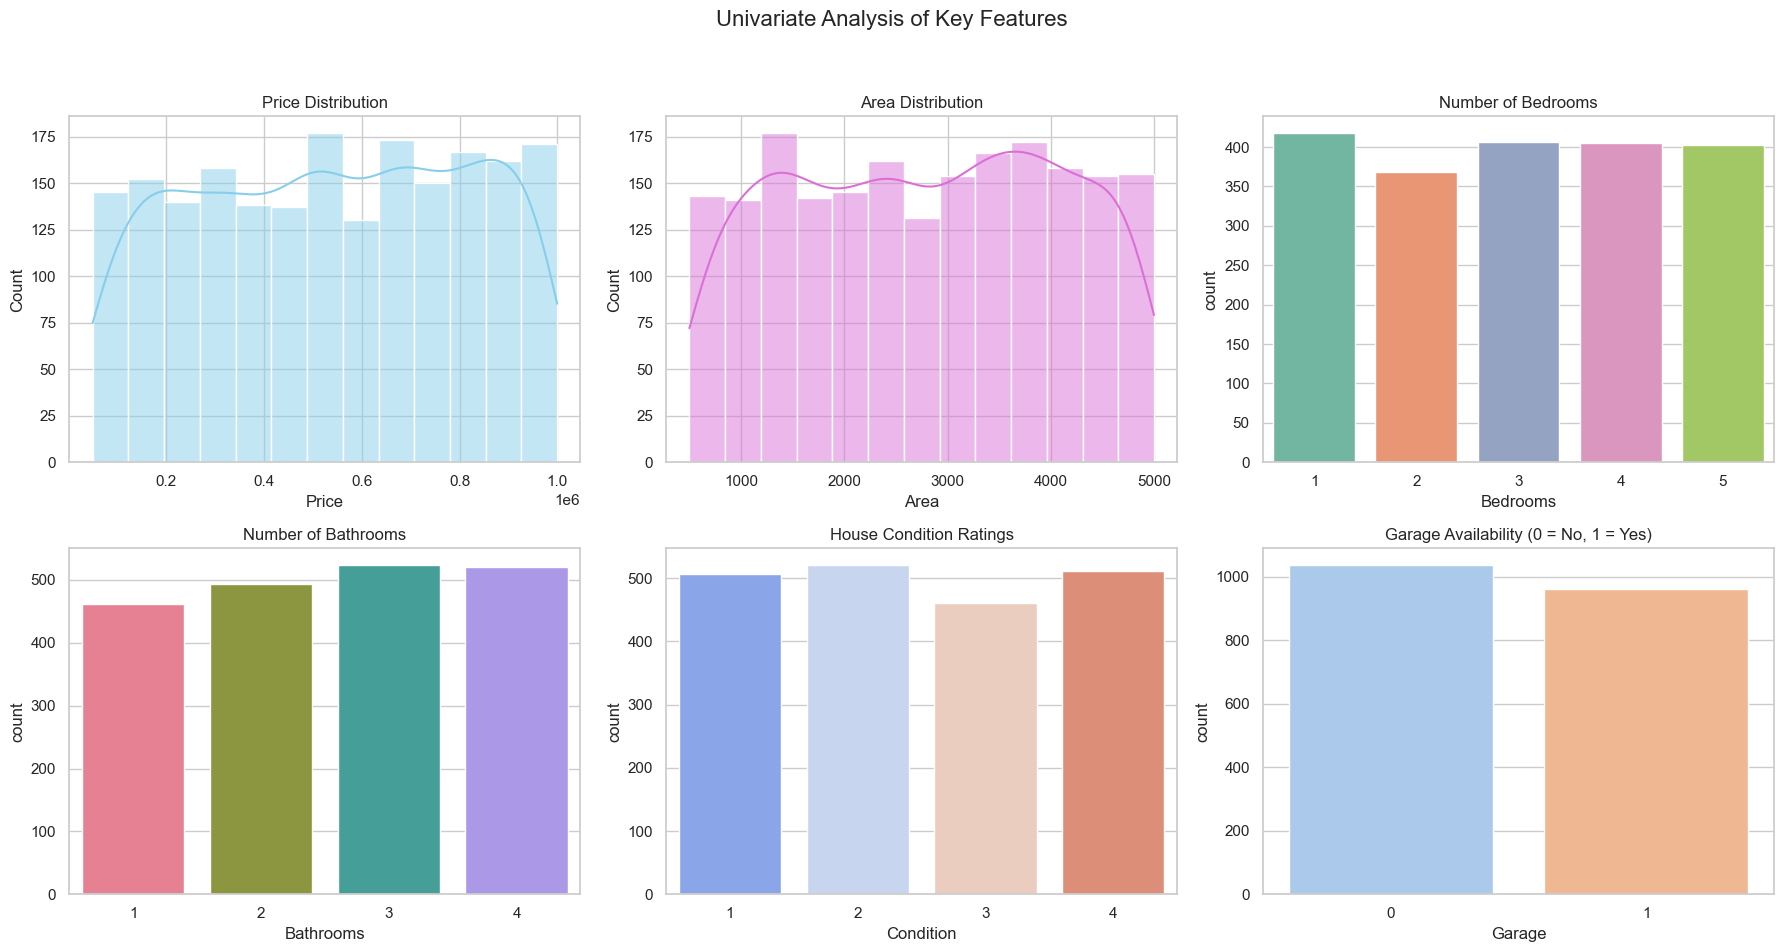

In [40]:
uni = UnivariateAnalyzer(processed_data)
uni.plot_distributions()


## 📊 Univariate Analysis of Dataset

Price & Area: Both are right-skewed — most houses are moderately priced and sized, with a few large/expensive ones.

Bedrooms & Bathrooms: Most houses have 2–4 of each.

Condition: Majority of homes are rated "Good" or "Excellent".

Garage: Fairly balanced between homes with and without garages

## Next step: Bivariate analysis with visualization

In [41]:
class BivariateAnalyzer:
    def __init__(self, df):
        self.df = df

    def plot_bivariate(self):
        import matplotlib.pyplot as plt
        import seaborn as sns

        sns.set(style="whitegrid")
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Bivariate Analysis of House Prices', fontsize=18)

        # 1. Area vs Price (scatter plot)
        sns.scatterplot(x='Area', y='Price', data=self.df, ax=axes[0, 0], color='teal')
        axes[0, 0].set_title('Area vs Price')

        # 2. Bedrooms vs Price (box plot)
        sns.boxplot(x='Bedrooms', y='Price', data=self.df, palette='Set2', ax=axes[0, 1])
        axes[0, 1].set_title('Bedrooms vs Price')

        # 3. Condition vs Price (box plot)
        sns.boxplot(x='Condition', y='Price', data=self.df, palette='coolwarm', ax=axes[1, 0])
        axes[1, 0].set_title('Condition vs Price')

        # 4. Location vs Avg Price (bar plot)
        avg_price = self.df.groupby('Location')['Price'].mean().reset_index()
        sns.barplot(x='Location', y='Price', data=avg_price, palette='husl', ax=axes[1, 1])
        axes[1, 1].set_title('Average Price by Location')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2574499965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bedrooms', y='Price', data=self.df, palette='Set2', ax=axes[0, 1])
C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2574499965.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Price', data=self.df, palette='coolwarm', ax=axes[1, 0])
C:\Users\PACE COMPUTERS\AppData\Local\Temp\ipykernel_7412\2574499965.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Price', data=avg_pr

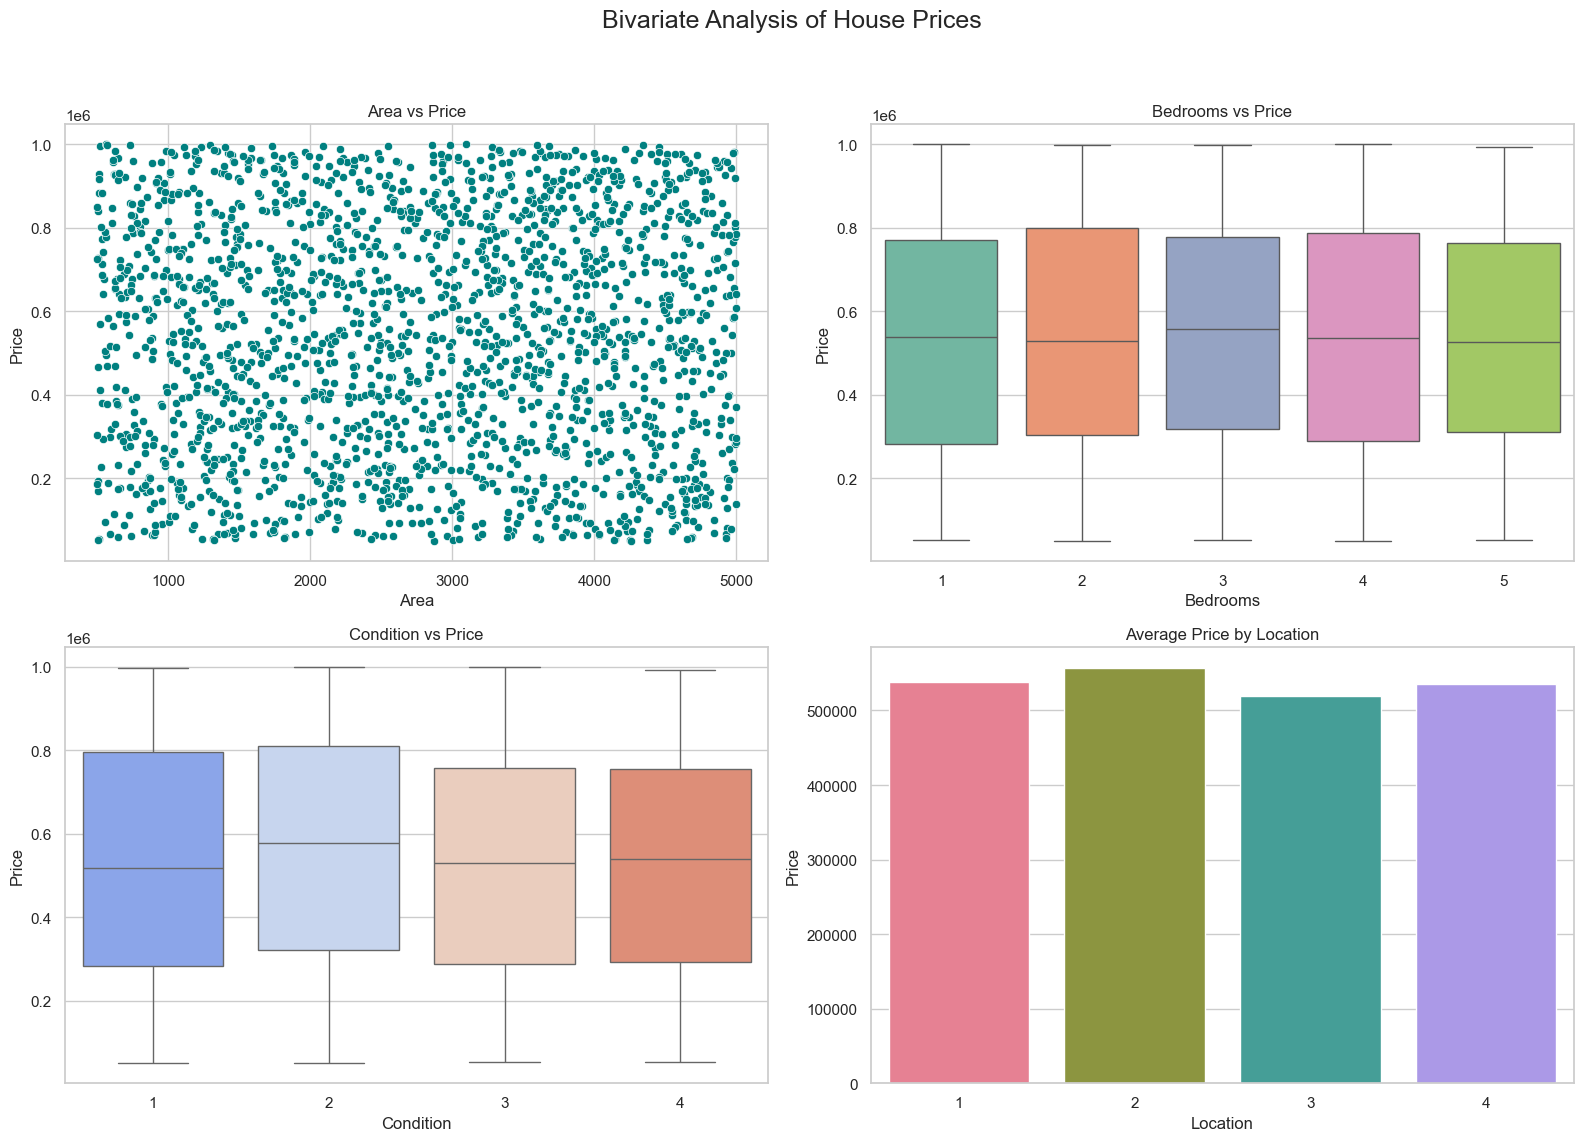

In [42]:
bi_analyzer = BivariateAnalyzer(processed_data)
bi_analyzer.plot_bivariate()



## 📊 Bivariate Analysis of Dataset
# Area vs Price:
There's a positive correlation — larger houses tend to have higher prices, though there are a few large homes with moderate prices, indicating some variability.

# Bedrooms vs Price:
Generally, houses with more bedrooms have higher prices, but the price increase isn't always consistent — some 2 or 3-bedroom homes are priced similar to larger ones, possibly due to other features.

# Condition vs Price:
As expected, better condition homes (Good/Excellent) are associated with higher prices. Poor condition homes cluster in the lower price range.

# Location vs Average Price:
Downtown locations have the highest average prices, followed by Urban and Suburban. Rural areas tend to have the lowest average prices — indicating location plays a major role in valuation

## Step 3: Data Splitting

In [43]:

class HousePriceDataHandler:
    def __init__(self, dataframe, target_column='Price'):
        self.df = dataframe
        self.target_column = target_column
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_features(self):
        self.X = self.df.drop(self.target_column, axis=1)
        self.y = self.df[self.target_column]

    def split_data(self, test_size=0.2, random_state=42):
        self.prepare_features()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y,
            test_size=test_size,
            random_state=random_state
        )
        print(f"Data split done. Train shape: {self.X_train.shape}, Test shape: {self.X_test.shape}")
        return self.X_train, self.X_test, self.y_train, self.y_test


In [44]:
# Assume df is your preprocessed DataFrame
data_handler = HousePriceDataHandler(processed_data)
X_train, X_test, y_train, y_test = data_handler.split_data()



Data split done. Train shape: (1600, 8), Test shape: (400, 8)


## Step 4: Model Training (SVM)

In [45]:

class HousePriceModel:
    def __init__(self, kernel='rbf', C=100, epsilon=0.1):
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)
        self.trained = False

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        self.trained = True
        print("Model training completed.")

    def evaluate(self, X_test, y_test):
        if not self.trained:
            raise Exception("Model must be trained before evaluation.")
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        print(f"Evaluation Results:\nMSE: {mse:.2f} | RMSE: {rmse:.2f} | R² Score: {r2:.2f}")
        return mse, rmse, r2

    def predict(self, input_data):
        if not self.trained:
            raise Exception("Model must be trained before making predictions.")
        return self.model.predict(input_data)
    def get_model(self):
        return self.model


In [ ]:

trainer = HousePriceModel()
trainer.train(X_train, y_train)
predictions = trainer.evaluate(X_test, y_test)



Model training completed.
Evaluation Results:
MSE: 77908628413.94 | RMSE: 279121.17 | R² Score: -0.00


## Step 5: Model Saving and Loading Trained Model with Pickle

We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.

### Why Use Pickle?
- Avoids retraining
- Good for deployment
- Makes model portable

The `PickleHandler` class has methods to save and load the model.

In [48]:

import pickle

with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(trainer.get_model(), f)
    print("Model saved successfully")



Model saved successfully
